# Stream and Process Live Tweets
#### Alex John Quijano

### 1. Introduction.

Twitter is a social networking platform where users can post messages related to entertainment, current events, news and politics, and other forms of information by creating "Tweets". Twitter users can also interact with each other by replying or retweeting tweets. Twitter has become a platform to many important discourse in relation to politics, science, technology, popular culture, and social movements since it was founded in 2006.

Since the beginning of big data revolution in the 21st century, taking data has become very easy. Twitter data can be mined through its Application Programming Interface (API) but with limits ( see <a href="https://developer.twitter.com/en/docs/basics/rate-limits.html">rate-limits</a> ). There are multiple ways you can mine twitter data but the easiest way possible is using the python NLTK module ( <a href="https://www.nltk.org/">NLTK</a> ) which will be discussed in Section 3.

**GITHUB.** <a href="https://github.com/stressosaurus/raw-data-twitter-tweets">raw-data-twitter-tweets</a>

**Purpose.** The scripts on this repository provides an easy way to stream, filter, and process live tweets iteratively for researchers interested in data science, mathematical modeling, computational linguistics, historical linguistics, and/or discourse analysis. This repository lets you stream live tweets via using the Natural Language Processing Tool Kit (NLTK) developed by Bird et. al. [1]. The code is designed to capture $n$ tweets in a way such that it streams continuously until a specified time. The streamer uses a list of keywords to capture tweets that matches those keywords.

After successful streaming, the code will filter the tweets to reduce the memory size. Processing is done separately to choose which time range to process.

**Warning.** Streaming live tweets for long periods is not recommended because the filesize gets very large unless you have reasonable file storage. The streamer also can capture any public tweets (protected tweets are not captured). That means it can capture, tweets from bot users, pornography, and profanity; when viewing these tweets, it might be NSFW.

### 2. Just Give Me the Data.

**Data Downloads.** If you want the preprocessed datasets you can download them in these following links.

**NOTE.** The time stamps of each tweet is in Universal Coordinated Time (UTC) but the labels of the files below is in Pacific Standard Time (PST).

**Step I: Raw Data.** <a href="https://drive.google.com/open?id=1UvbxIyBvBwFRhoX5zYBWti1Pr47wO7R8">(Raw) September 2017 to October 2017 (31.04GB)</a>

**Step II: Filtered Data.** <a href="https://drive.google.com/open?id=1XlZ541wg3TWFfiAk1GdPF7WC8fqq0oBo">(Filtered) September 2017 to October 2017 (8.54GB)</a>

**Step III: Processed Data.** <a href="https://drive.google.com/open?id=1mNM4Ek9tTAkDPZ0d4I82fYzOWKj5uiOR">(Processed) September 2017 to October 2017 (6.04GB)</a>

**Step IV: Tabulated Data.** This is the processed data converted into table form. <a href="https://drive.google.com/open?id=13WsCp1kzLXKkhzyZpTEzoTfflI5V3-pf">(Tabulated) September 2017 to October 2017 (3.38GB)</a>

**Step V: Subsets and Merged Subsets.** This is the tabulated data selecting only related tweets according to some selected hashtags.

1. <a href="https://drive.google.com/open?id=1lCmrIByasBjOFKE6egNV1VYmUq-j9H_t">(Subset) September 2017 to October 2017 (412.10MB)</a>
2. <a href="https://drive.google.com/open?id=1pWqnDOpbp7vegr3ThItmqt5L6OYBnB7E">(Merged Subset) September 2017 to October 2017 (404MB)</a>

**Data tabulation and subsetting.** The raw Twitter data collected during live streaming was processed in five steps. The first step is when the raw data is saved into a JSON file and processed through a filter and processing steps where the unecessary information (such as hyperlinks and empty strings) are filtered away. The last two steps are the conversion from JSON data structure to a tabular data structure for easy access of information. Tabulating and subsetting is discussed in Section 4.

**Subset information.** The subset datasets are with tweets that contain and relate to the following hashtags (lowercased).
```
takeaknee
taketheknee
prayforvegas
metoo
```

**Table Column Descriptions.**
	# *-tweet.csv.gz file: (Table of tweet information where each row is a unique tweet)
	#   1.  TID   - Tweet ID (always unique)
	#   2.  RTT   - Retweeted Tweet (1-True or 0-False)
	#   3.  RPT   - Replied Tweet (1-True or 0-False)
	#   4.  TRP   - Tweet Reply (1-True or 0-False)
	#   5.  NRT   - Normal Tweet (1-True or 0-False)
	#   6.  PTID  - Parent Tweet ID (if the tweet is a reply)
	#   7.  UID   - User ID
	#   8.  USN   - User screen name
	#   9.  TM    - Time created
	#   10. RPC   - Replied Counts
	#   11. FVC   - Favorited Counts
	#   12. RTC   - Retweeted Counts
	#   13. L     - language
	#   14. TXT   - Tweet Text
	#   15. HTGS  - Hashtags (sep=',')
	#   16. UMS   - user mentions (sep=',')
	#   17. TMRT  - Time if retweeted (each observation sep=',')
	#   18. RPCRT - Replied Counts if retweeted (each observation sep=',')
	#   19. FVCRT - Favorited Counts if retweeted (seach observation sep=',')
	#   20. RTCRT - Retweeted Counts if retweeted (each observation sep=',')
	#   21. UIDRT - User IDs if retweeted (each observation sep=',')
	#   22. USNRT - User screen names if retweeted (each observation sep=',')

	# *-user.csv.gz file: (table of user information where each row is a unique user)
	#	1. UID  - User ID
	#	2. USN  - User screen name
	#	3. UT   - Time user created
	#	4. UNFL - User number of followers (each observation sep=',')

In [1]:
import matplotlib.pyplot as plt
import customPlot as cp
import twitter as tw
import numpy as np
import pandas as pd

#### 2.1 Reading Processed Data (September 23-24, 2017).

As an example, we use the subset tweets taken from 09/23/2017-09/24/2017 (PST) [09/24/2017-09/25/2017 (UTC)]. The python script below reads the data set.

In [2]:
stream = 'A'
date_range = '09232017-09242017'
T, U = tw.read_csv(stream,date_range,dtype=str,subset=True,
                   which_set='merged',which_set_params=['hashtag','a'])

#### 2.2 Time-line of Twitter Counts.

The datasets are tweets observed while a user either tweets or retweets while the live streamer was turned on. If a user retweets a tweet a few days ago while the streamer was on, then the streamer can capture the retweet and the original tweet. Similar to when a user tweets a reply to a tweet.

We can visualize the time-line (universal coordinated time UTC) of counts using the script below.

In [3]:
bins_u, bins_c, hour_label, day_label = tw.time_binner(T,by='hour')

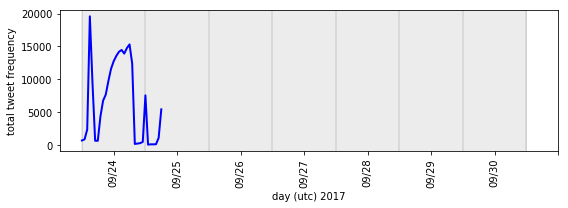

In [4]:
# figure twitter counts by hour
fig, ax = plt.subplots(1,1,figsize=(8,3))
total_counts = list(bins_c.values())
ax.axvspan(0,len(hour_label[0]),alpha=0.15,color='gray')
for t in range(0,len(total_counts)+1):
    if t%24 == 0:
        ax.axvline(t,alpha=0.10,color='black')
ax.plot(range(0,len(total_counts)),total_counts,'-',linewidth=2,color='blue')
ax.set_xticks(day_label[1])
ax.set_xticklabels(day_label[0],rotation=90)
ax.set_xlabel('day (utc) 2017')
ax.set_ylabel('total tweet frequency')
plt.tight_layout()
plt.show()

#### 2.3 Counting the Number of Tweets by Category.

There are four categories of tweets.

1. **Normal.** A set of tweets with no replies and it was never retweeted during streaming. Since these tweets are streamed live, the number of likes, retweeted counts, and reply counts are expected to be zero.
2. **Replied.** A set of tweets that have at least one observed reply. We call the replied tweet as a parent tweet with children as the replies. Only when we stream a reply, we can record a nonzero likes, retweeted counts, and reply counts if any. There some replied tweets with no tweet and user id due to the lack of information from the raw data.
3. **reply.** These are a set of tweets that are replies to tweets. These are the children tweets of the parent tweets. A tweet reply can also be a parent tweet. There some tweet replies with parent tweet with only tweet id information.
4. **Retweets.** These are the tweets that are retweeted/replicated at least once. A retweet can also be a parent tweet.

We can visualize these sets by using the script below.

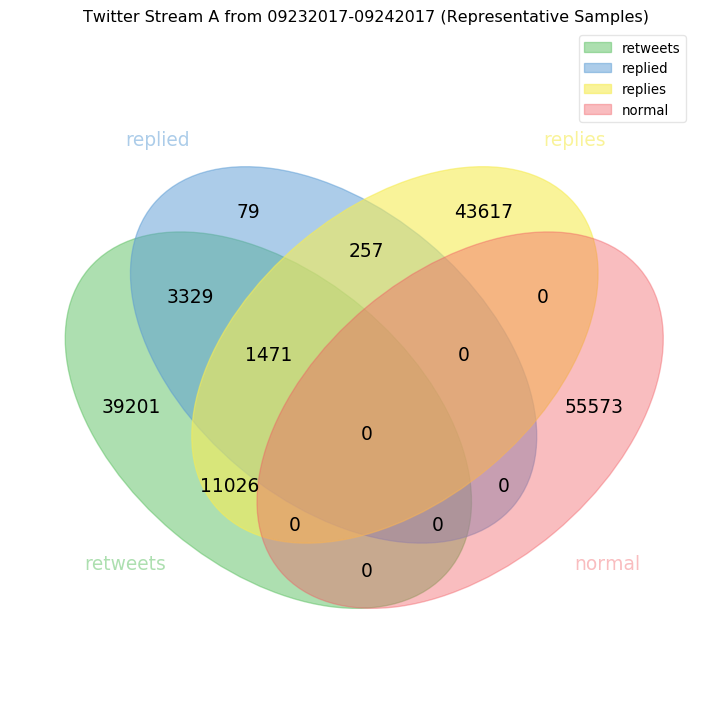

In [5]:
T_categories = tw.tweet_id_categories(T,dtype=str)
info_labels = list(T_categories.keys())
info_sets = [T_categories[i] for i in info_labels]
sets = cp.get_labels(info_sets, fill=['number'])
cp.venn4(sets,names=info_labels,figsize=(9,9))
plt.title('Twitter Stream '+stream+' from '+date_range+' (Representative Samples)')
plt.show()

The above figure shows a venn diagram of the four categories of tweets. We can see that there are zero intersections of the normal tweets (as expected) while the other sets have intersections. We observed that there are 425 replied tweets, 4248 tweet replies, 3612 retweeted tweets. We can also observed that intersection between retweeted set and the replied set; there are 268 retweeted tweet with replies.

#### 2.4 Getting Random tweets from a category.

***Getting random normal tweet information.***

In [6]:
NRT_ids = T.index[T['NRT'] == '1'].tolist()
T.loc[np.random.choice(NRT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
912030571051622400,tmj_tx_retail,Sep 24 2017 19:06:47 +0,0,0,0,"Interested in a #job in #Eastland, TX? This co...",*
911861503921238017,MillarMatthews,Sep 24 2017 07:54:58 +0,0,0,0,Billie Lourd Talks Losing ‘Goddesses' Carrie F...,*
912117229327659009,rto_uru,Sep 25 2017 00:51:08 +0,0,0,0,👉 Monumento De Washington: El Obelisco Más Imp...,*
911946974626291712,ksjiinx,Sep 24 2017 13:34:36 +0,0,0,0,"PLEASE TAKE A FULL REST, WE LOVE YOU ALWAYS @B...",*
911963303278252032,goterrio,Sep 24 2017 14:39:29 +0,0,0,0,This chick Kerns on @JoyAnnReid is a propagand...,*
911860920523124736,EMahmoudSoliman,Sep 24 2017 07:52:39 +0,0,0,0,Federal government notifies 21 states of elect...,*
911928616534941696,kabloobpd,Sep 24 2017 12:21:39 +0,0,0,0,A PAKISTANI DEBATE PANELIST ON TIMENOW TV SHOU...,*
911995993469722625,BrianConleyONE,Sep 24 2017 16:49:23 +0,0,0,0,@GregMcElroy @finebaum Do either of you think ...,*
911966285633789952,tparker_63,Sep 24 2017 14:51:20 +0,0,0,0,Well that makes things interesting. Need a few...,*
911882650830491648,futureof_work,Sep 24 2017 09:19:00 +0,0,0,0,This Guy Came to the U.S. From Germany to Sell...,*


***Getting random retweeted tweet information.***

In [7]:
RTT_ids = T.index[T['RTT'] == '1'].tolist()
T.loc[np.random.choice(RTT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911914946249805824,davidwebbshow,Sep 24 2017 11:27:20 +0,0,15,4,Listen to MCRD Spotlight- Vietnam Gallery by D...,Sep 24 2017 13:21:24 +0
911878009640034304,SuaraMCA,Sep 24 2017 09:00:34 +0,1,8,18,Muslim #Rohingya eksodus dari Buthidaung (22/9...,"Sep 24 2017 09:25:06 +0,Sep 24 2017 11:38:25 +0"
911985497563697152,Impeach_D_Trump,Sep 24 2017 16:07:41 +0,3,82,31,@HillaryClinton Gotta love this.,Sep 24 2017 16:17:25 +0
912190267041644544,alphabetsuccess,Sep 25 2017 05:41:21 +0,0,12,7,If your happiness depends on what somebody els...,Sep 25 2017 05:56:41 +0
911966990687928320,FiveRights,Sep 24 2017 14:54:08 +0,21,187,110,.@NFL Football is not the proper venue for pol...,"Sep 24 2017 14:59:05 +0,Sep 24 2017 15:11:24 +..."
911823150312251398,JBiebxRose,Sep 24 2017 05:22:34 +0,2,106,38,WILL YA STOP THINKING UR LOOKS R ALL WE CARE A...,Sep 24 2017 07:35:26 +0
911692764252958723,speedingisfun,Sep 23 2017 20:44:28 +0,1,2,2,@1visionamd @Maxinerunner @mitchellvii @SenJoh...,Sep 24 2017 10:41:26 +0
912032961813516288,ComicBook,Sep 24 2017 19:16:17 +0,1,25,6,Stephen Amell Comments On #Arrow And #Supernat...,Sep 24 2017 19:51:34 +0
910274930494799872,Scavino45,Sep 19 2017 22:50:30 +0,839,19631,3843,.@POTUS @realDonaldTrump and @UN Secretary-Gen...,Sep 24 2017 13:32:41 +0
911891029388926977,iheartjennychu,Sep 24 2017 09:52:18 +0,0,2,1,@realDonaldTrump When are you going to resign?...,Sep 24 2017 10:24:50 +0


***Getting random replied tweets information.***

In [8]:
RPT_ids = T.index[T['RPT'] == '1'].tolist()
T.loc[np.random.choice(RPT_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911922225577709568,StopMotionDad,Sep 24 2017 11:56:15 +0,3,20,13,It's funny how the #TakeAKnee and #TakeTheKnee...,Sep 24 2017 13:18:37 +0
911913477140287490,DrMartyFox,Sep 24 2017 11:21:30 +0,11,225,171,Thank You #PresidentTrump #RogerGoodell defend...,"Sep 24 2017 11:26:55 +0,Sep 24 2017 11:37:26 +..."
911793579399446528,KEEMSTAR,Sep 24 2017 03:25:04 +0,44,1643,399,New #DramaAlert 15 mins RT if u going to be 1st,"Sep 24 2017 03:25:13 +0,Sep 24 2017 03:25:14 +..."
911899919342014465,loyloychoc,Sep 24 2017 10:27:37 +0,10,387,25,@pithywords @RichardHaass @realDonaldTrump It ...,"Sep 24 2017 15:12:55 +0,Sep 24 2017 17:45:55 +0"
912042662466932737,Hoosiers1986,Sep 24 2017 19:54:50 +0,300,6916,3218,Army Rangers won't #TakeTheKnee even if they h...,"Sep 25 2017 06:01:53 +0,Sep 25 2017 06:32:56 +..."
911943084514127873,Alyssa_Milano,Sep 24 2017 13:19:09 +0,232,2852,727,"For your records, @realdonaldtrump. People don...","Sep 24 2017 13:19:38 +0,Sep 24 2017 13:20:33 +..."
911984408269336576,joncoopertweets,Sep 24 2017 16:03:21 +0,44,720,334,The Pittsburgh Steelers are first NFL team to ...,"Sep 24 2017 16:17:41 +0,Sep 24 2017 16:51:01 +..."
911059276554280960,kwilli1046,Sep 22 2017 02:47:12 +0,399,4106,4695,2014 #Clinton Foundation tax return. They took...,"Sep 24 2017 03:07:42 +0,Sep 24 2017 03:07:42 +..."
912111286175043590,BTS_Billboard,Sep 25 2017 00:27:31 +0,4,246,201,"ARMY, keep streaming 'Her' especially ""DNA."" D...","Sep 25 2017 00:28:18 +0,Sep 25 2017 00:38:18 +..."
911748033204883456,nkolakowski,Sep 24 2017 00:24:05 +0,15,447,33,@realDonaldTrump Why don’t you tweet some link...,Sep 24 2017 07:39:39 +0


***Getting random tweet replies information.***

In [9]:
TRP_ids = T.index[T['TRP'] == '1'].tolist()
T.loc[np.random.choice(TRP_ids,size=10,replace=False),['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911969795863609349,Notverycon,Sep 24 2017 15:05:17 +0,1523,647,179,@JoeNBC You know what's sad? Our POTUS is cryi...,*
911979403638317057,RogerThatB17,Sep 24 2017 15:43:28 +0,*,*,*,@darkphoenixx_ @tecvested @NikoTheFarmer @FoxN...,*
912037550772166656,fghtng4lf,Sep 24 2017 19:34:31 +0,1647,6039,1944,@realDonaldTrump Thank you for saying and stan...,*
911957251132239872,Antoine10159441,Sep 24 2017 14:15:26 +0,5,37,18,@thehill Hold your heads up gentleman when you...,*
911798576354922496,HeyImjustsayin,Sep 24 2017 03:44:55 +0,1,51,12,@amandablount2 Although my Green Beret/Ranger ...,*
912003354557079554,Cameron58503515,Sep 24 2017 17:18:38 +0,176,559,337,@2Chron169 @NIVIsa4031 @StacyLStiles @SparkleS...,*
911928313534451713,StoneBreakerII,Sep 24 2017 12:20:27 +0,155,1745,520,"@RepKarenBass Our President and Shaq, say stop...",*
911982169307807744,TinaDesireeBerg,Sep 24 2017 15:54:27 +0,0,2,3,@librab103 @BLUpfront @realDonaldTrump Indeed ...,Sep 24 2017 16:29:15 +0
911789714398625793,JacobAWohl,Sep 24 2017 03:09:42 +0,2542,5410,1105,@realDonaldTrump I pinch myself sometimes. We ...,"Sep 24 2017 03:12:59 +0,Sep 24 2017 03:17:32 +..."
911868171812065281,pdachil,Sep 24 2017 08:21:28 +0,1322,10445,4086,"@SheriffClarke @nflcommish Respect, get it?",*


#### 2.5 Getting Random User Information.

The user information is a separate dataset from the tweets. You can reference the 'UID' (user id) from the 'tweet' set to get information about the user in the 'user' set and vice versa.

Note that the 'UNFL' (user number of followers) are in a list structure because it corresponds to the user's tweets. This structure let's us track the change of information when a user tweets something.

In [10]:
user_ids = U['USN'].keys().tolist()
U.loc[np.random.choice(user_ids,size=10,replace=False)]

,USN,UT,UNFL
603001645,Avriion,Jun 08 2012 19:20:47 +0,153
3651646454,masad811,Sep 22 2015 19:11:30 +0,9
887459156143353856,ChuckWagon645,Jul 18 2017 23:48:45 +0,3
14329880,Vinncent,Apr 08 2008 05:33:09 +0,"17877,17880,17884,17890,17890,17893,17893,1789..."
801431372351021056,Dennis4IU,Nov 23 2016 14:25:03 +0,"424,424,425,425"
30703815,BLUELOU70,Apr 12 2009 19:23:04 +0,1362
415678135,Futbol_digital,Nov 18 2011 17:17:19 +0,19008
1072642915,the_fed_23,Jan 09 2013 02:38:22 +0,20216
877668316357066753,memesterjess,Jun 21 2017 23:23:27 +0,"51,51"
3250141399,polishprincessh,Jun 19 2015 22:03:06 +0,"8962,8966,8969,8965,8969,8970,8972,8973,8962,8..."


#### 2.6 Getting random tweets of a specific user.

In [11]:
# Alyssa_Milano
tid = np.random.choice(T.index[T['USN']=='Alyssa_Milano'],size=6,replace=False)
T.loc[tid,['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
911943084514127873,Alyssa_Milano,Sep 24 2017 13:19:09 +0,232,2852,727,"For your records, @realdonaldtrump. People don...","Sep 24 2017 13:19:38 +0,Sep 24 2017 13:20:33 +..."
911969299987861510,Alyssa_Milano,Sep 24 2017 15:03:19 +0,41,1013,326,#TakeTheKnee,"Sep 24 2017 15:11:21 +0,Sep 24 2017 15:16:36 +..."
912003288295514113,Alyssa_Milano,Sep 24 2017 17:18:22 +0,239,7773,2405,"Sorry to bug you, @realDonaldTrump. But this i...","Sep 25 2017 06:43:33 +0,Sep 24 2017 17:21:01 +..."
911272155148677121,Alyssa_Milano,Sep 22 2017 16:53:07 +0,88,2624,890,"For your records, @IvankaTrump. You should rea...",Sep 24 2017 08:00:32 +0
911961779856691201,Alyssa_Milano,Sep 24 2017 14:33:26 +0,41,1126,241,#TakeTheKnee,"Sep 24 2017 14:35:41 +0,Sep 24 2017 14:36:27 +..."
911948525872844802,Alyssa_Milano,Sep 24 2017 13:40:46 +0,273,11739,2684,BREAKING: Jaguars owner has taken a knee in so...,"Sep 25 2017 06:30:50 +0,Sep 24 2017 13:45:08 +..."


In [12]:
# realDonaldTrump
tid = np.random.choice(T.index[T['USN']=='realDonaldTrump'],size=6,replace=False)
T.loc[tid,['USN','TM','RPC','FVC','RTC','TXT','TMRT']]

,USN,TM,RPC,FVC,RTC,TXT,TMRT
387274184725762049,realDonaldTrump,Oct 07 2013 17:52:15 +0,297,693,1436,Government is shut down yet Obama is now haras...,Sep 24 2017 19:05:37 +0
878078560715538432,realDonaldTrump,Jun 23 2017 02:33:37 +0,4927,53965,10094,.@FLOTUS &amp; I were honored to host our firs...,Sep 24 2017 19:09:17 +0
907588803161939968,realDonaldTrump,Sep 12 2017 12:56:47 +0,32869,107688,24193,Fascinating to watch people writing books and ...,Sep 24 2017 09:39:25 +0
909818335130525697,realDonaldTrump,Sep 18 2017 16:36:09 +0,3702,37357,8845,We commend SG @AntonioGuterres &amp; his call ...,Sep 24 2017 12:21:19 +0
597831508557180932,realDonaldTrump,May 11 2015 18:31:53 +0,97,1438,1634,Great shot by @KingJames yesterday. Lebron is ...,Sep 24 2017 04:05:06 +0
910312303635116033,realDonaldTrump,Sep 20 2017 01:19:00 +0,4058,30021,6723,The true question for the @UN... 🎥,Sep 24 2017 14:18:25 +0


### 3. Stream, FIlter and Process Live Tweets.

Using the streamer scripts **streamTwitter.py**, **loop.streamTweets.sh**, and **run.loop.streamTweets.sh** requires two things.

1. The NLTK python modules which is available in this website ( https://www.nltk.org/ ). You can read about it in detail in this book by Bird et. al. [1].

2. Twitter Application Progamming Interface (API) keys.

#### 3.1 Installing the Natural Language Tool Kit (NLTK) and NLTK Corpora.

***Install NLTK using Linux terminal.***

```bash
sudo pip install -U nltk
```

***Install NLTK Corpora using Python.***

```python
import nltk
nltk.download()
```

#### 3.2 Setting Up the Twitter Application Programming Interface (API).

You can follow the NLTK instructions for setting up the API here ( <a href="http://www.nltk.org/howto/twitter.html">NLTK</a> ) but essentially it comes down into three steps.

* **Step 1.** Create a Twitter account ( <a href="https://twitter.com/?lang=en">twitter.com</a> )
* **Step 2.** Apply for a developer account - standard API ( <a href="https://developer.twitter.com/en/apply-for-access">developer.twitter.com</a> )
* **Step 3.** Copy your keys in the format - shown below - while saving it into a text file named ***credentials.txt***. Create a folder/directory ***twitter-files*** in your home directory and place the text file into that new folder.

```bash
app_key=[key]
app_secret=[secret]
oauth_token=[token]
oauth_token_secret=[secret token]
```

#### 3.3 Streaming and Filtering Live Tweets.

Before you can stream, you need to provide a list of keywords. The NLTK streamer requires a list of keywords to capture live tweets with those keywords.

For example you need to create a text file named ***keywords-stream[X].txt*** in the ***keywords-stream*** folder where **[X]** is the whatever you want to name your list. Then, list all the keywords inside the text file like shown below.

```bash
normal
abnormal
supernormal
unnormal
binormal
mononormal
uninormal
homonormal
heteronormal
```

Next, edit the lines shown below of the bash script **run.loop.streamTweets.sh**. The ***path_twitterFiles*** variable is the absolute path to the **credentials.txt** file. The ***STDVID*** is the name of your list **[X]**. Below is an example where we tell the streamer to take 4000 tweets for every loop until August 14, 2018 at 6:14 pm (the time is in 24-hour format). If the entered time is in the past, then the loop will just immediately stop upon execution.

```bash
path_twitterFiles="/home/[username]/twitter-files"

STDVID=[X]
stopDay=14
stopMonth=08
stopYear=2018
stopHour=18
stopMinute=14
tweetsPerLoop=4000
```

Save the updated **run.loop.streamTweets.sh** and run it using the command below on linux terminal. The streamer saves the tweets every loop and filters and compresses the tweets every day and for every month.

```bash
./run.loop.streamTweets.sh
```

#### 3.4 Processing Live Tweets.

Make sure you have the compressed filtered data in the **[X]-filtered** folder where **[X]** is the name of the keywords list. The streamer saves the tweets in JSON format ( you can see an overview of the JSON data structure here ( <a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object"> tweet-object </a>).

The processor will process the JSON file such that it takes in information and converts it into a python dictionary data structure for easy access. The advantage of this data structure is that we can track connected tweets (i.e. replies and retweets to the a parent tweet) more easily than dealing with the JSON files directly.

To process the streamed tweets, use the **processTweets.sh** bash file. This file takes in three arguments.

1. **[X]** $\rightarrow$ The name of the keyword list.
2. An array of specified dates you want to process.
3. The number of cores you want use (the code is paralellized in a multi-threading fasion where it can process $n$ tweets at a time).

Use the example bash script below where it will process the data set using the A keyword list from September 23, 2017 to September 24, 2017 and using 3 cores. The processed tweets is saved into **[X]-processed** folder.

*Download Filtered Data First (see Section 2).*

```bash
STDVID=A
dates=("09232017" "09232017")
./processTweets.py ${STDVID} "${dates[*]}" 3
```
```bash
STDVID=A
dates=("09232017" "09242017")
./processTweets.py ${STDVID} "${dates[*]}" 3
```

### 4. Tabulate and Subset Tweets.

#### 4.1. Tabulating Tweets.

Make sure you have the processed data in the **[X]-processed** where **[X]** is the name of the keywords list.

Use the example bash script below where it will tabulate the processed data using A keyword list from September 23, 2017 to September 24, 2017. The tabulated tweets is saved into **[X]-tabulated** folder.

*Download Processed Data First (see Section 2).*

```bash
./tabulateTweets.py 'A' '09232017-09232017'
./tabulateTweets.py 'A' '09232017-09242017'
```

#### 4.2. Subsetting Tabulated Tweets.

Create a folder named **keywords-subset** and make a text file named **keywords-[F]-[Y].txt** where **[F]** is the column to filter and **[Y]** is for whatever you want to name your keyword subset list. Then, list all the keywords like shown below or the hashtag list in Section 2.

```
hashtag
love
hate
```

Use the example bash script below where it will subset the tabulated data set using the hashtag keyword list named **a** from September 23, 2017 to September 24, 2017. The tabulated tweets is saved into **[X]-subset** folder. The third line of the below script is where you can merge two tabulated tweets. The merged tweet is saved into **[X]-merged** folder.

*Download Tabulated Data First (see Section 2).*

```bash
./indexTweets.py 'A' 'hashtag' 'a' '09232017-09242017' 100000 '09232017-09242017'
./subsetTweets.py 'A' 'hashtag' 'a' '09232017-09232017' 100000 '09232017-09242017'
./subsetTweets.py 'A' 'hashtag' 'a' '09232017-09242017' 100000 '09232017-09242017'
./mergeTweets.py 'A' 'hashtag' 'a' '09232017-09242017'
```

### References

1. Bird, Steven, Ewan Klein, and Edward Loper. Natural language processing with Python: analyzing text with the natural language toolkit. " O'Reilly Media, Inc.", 2009.